# Introduction:

This Notebook contains an analysis related to some enviromental problems such as global warming, emissions and energy type merged with the global mortality rate of the different types of energy.
The analysis will be restricted to the years range 1980-2019 and it will cover the whole world.

# 1) Motivation
> * What is your dataset?

Since this is a really wide topic, for this analysis we will use 6 datesets: 

- World energy consumption
- Per capita energy use
- Environmental temperature change
- Global mortaly rate by energy source
- Share energy consumption by source 
- Annual CO2 emissions per country

> * Why did you choose these particular datasets?

The goal of this analysis is to deep dive into the environmental problems with a different point of view.
We often hear about reducing emissions, but what about proposing a specific ratio of energy type? 
All these datasets, combined together, allow us to analyze the relationships between global warming, emissions, mortality and energy type, to see the imapact level of the nuclear energy compared to the other energy types and finally to discover if there could be a suitable combination of energy types for each country and to forecast the effect of this specific combination for each country on global warming.

> * What was your goal for the end user's experience?

We would like to communicate the results of this analysis in a clear and easy way for the readers to understand it and consequently think about the environmental problem in a different light, hoping thereby to arouse their interest in this important issue for the world we live in. 

# 2) Basic stats. 
Let's understand the dataset better
> * Write about your choices in data cleaning and preprocessing

As we will see below in the preprocessing step of the datasets, there are some of them with null values such as the "Code" variable and in those cases we will remove this attribute. 

A couple of these datasets contains more null values...(?)

We will restict the year range to 1980-2019. 

In addition, we will change some attributes name to make them easier to read and use.

Merging datasets..(?)

In [25]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#loading the data
data1 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/per-capita-energy-use.csv")
data2 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='windows-1252')
data = [['Coal', 100000], ['Oil', 36000], ['Natural gas', 4000], ['Hydro', 1400], ['Rooftop solar', 440], ['Wind', 150], ['Nuclear', 90]]
data3 = pd.DataFrame(data, columns = ['Energy', 'mortality']) #mortality per thousand terawatt hour
data4 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/share-energy-consum-by-source.csv")
data5 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/annual-co2-emissions-per-country.csv")
data6 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/population_by_country_2020.csv")
data7 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/world_country_and_usa_states_latitude_and_longitude_values.csv")

---
## Data 1: Per capita energy use

In [5]:
#data1.head()
#data1.isnull().sum()
# removing the attribute "Code" which contains null values
data1.pop("Code")
# changing column names
data1.columns=  ['Country', 'Year', 'Energy per capita (kWh)']
data1.head()

,Country,Year,Energy per capita (kWh)
0,Afghanistan,1980,583.294
1,Afghanistan,1981,666.378
2,Afghanistan,1982,725.660
3,Afghanistan,1983,912.140
4,Afghanistan,1984,941.393


---
## Data 2: Environmental temperature change

In [6]:
data2 = pd.read_csv("/Users/mac/Documents/GitHub/Social_data/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='windows-1252')


#data2.head()
#data2.isnull().sum()

# restriction years range 1980-2019 on the attributes
# Remove columns as index base
# Remove all columns between column index 7 and 26
data2.drop(data2.iloc[: , 7:26], inplace = True, axis = 1)
data2.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1980,Y1981,Y1982,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,-0.393,1.724,0.678,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.222,1.088,-2.101,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,-0.628,1.166,-1.781,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


---
## Data3: Global mortaly rate by energy source

In [7]:
data3.head()

,Energy,mortality
0,Coal,100000
1,Oil,36000
2,Natural gas,4000
3,Hydro,1400
4,Rooftop solar,440


---
## Data4: Share energy consumption by source 

In [8]:
#data4.head()
#data4.isnull().sum()
# removing the attribute "Code" which contains null values
data4.pop("Code")

# changing column names
data4.columns=  ['Country', 'Year', 'Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others renewables']

# restriction years range 1980-2019
data4= data4[data4.Year >= 1980]
data4= data4[data4.Year < 2020]

data4.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
15,Africa,1980,49.047,32.009,0.0,0.000,7.903,0.0,11.007,0.034
16,Africa,1981,46.881,33.628,0.0,0.000,7.374,0.0,12.085,0.032
17,Africa,1982,46.099,34.736,0.0,0.000,6.909,0.0,12.223,0.032
18,Africa,1983,46.413,34.407,0.0,0.000,6.063,0.0,13.086,0.031
19,Africa,1984,45.905,35.640,0.0,0.509,5.773,0.0,12.142,0.030


In [9]:
# df_world
df_world= data4[data4.Country== "World"]
df_world.pop("Country")
df_world.head()

,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
4244,1980,45.830,26.869,0.0,2.547,6.196,0.0,18.341,0.177
4245,1981,44.387,27.373,0.0,3.023,6.359,0.0,18.631,0.191
4246,1982,43.230,27.847,0.0,3.300,6.514,0.0,18.841,0.222
4247,1983,42.247,28.249,0.0,3.680,6.684,0.0,18.840,0.242
4248,1984,41.254,28.123,0.0,4.261,6.594,0.0,19.444,0.258


---
## Data 5: Annual CO2 emissions per country

In [10]:
#data5.head()
#data5.isnull().sum()

# removing the attribute "Code" which contains null values
data5.pop("Code")

# common range of years for all datasets
# restriction years range 1980-2019
data5= data5[data5.Year >= 1980]
data5= data5[data5.Year < 2020]

# changing column names
data5.columns=  ['Country', 'Year', 'Annual CO2 emissions']

data5.head()

,Country,Year,Annual CO2 emissions
31,Afghanistan,1980,1756302
32,Afghanistan,1981,1978463
33,Afghanistan,1982,2094581
34,Afghanistan,1983,2519954
35,Afghanistan,1984,2821540


# Data6:  Population by country in 2019

In [11]:
#data6

# keeping only the column we need on Population
data6.drop(data6.iloc[: , 2:11], inplace = True, axis = 1)

#changing columns names
data6.columns=['Country', 'Population']
data6.head()

,Country,Population
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785


# Data 7: latitude and longitude of all countries

In [12]:
#data7.head()

# keeping only the column we need on latitude and longitude and country
data7.drop(data7.iloc[: , 4:7], inplace = True, axis = 1)

#removing the columns we don't need
data7.pop("country_code")
data7.pop("usa_state")

#changing column names
data7.columns=['latitude', 'longitude', 'Country']

data7.head()

,latitude,longitude,Country
0,42.546245,1.601554,Andorra
1,23.424076,53.847818,United Arab Emirates
2,33.939110,67.709953,Afghanistan
3,17.060816,-61.796428,Antigua and Barbuda
4,18.220554,-63.068615,Anguilla


## data145 

In [13]:
# merging data1, data4 and data5
data14 = pd.merge(data4, data1, on=['Country','Year'])
data145= pd.merge(data14, data5, on=['Country','Year'])
data145.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions
0,Africa,1980,49.047,32.009,0.0,0.000,7.903,0.0,11.007,0.034,3569.616,536509759
1,Africa,1981,46.881,33.628,0.0,0.000,7.374,0.0,12.085,0.032,3861.601,549389371
2,Africa,1982,46.099,34.736,0.0,0.000,6.909,0.0,12.223,0.032,4008.212,572603068
3,Africa,1983,46.413,34.407,0.0,0.000,6.063,0.0,13.086,0.031,4000.224,595441085
4,Africa,1984,45.905,35.640,0.0,0.509,5.773,0.0,12.142,0.030,4017.939,650285298


---
## datanew: Data145 and population in 2019 

In [14]:
# creating data145 + population in 2019 for the model we will create
datanew= data145[data145.Year == 2019]
datanew= pd.merge(datanew, data6, on=['Country'])
#datanew.head()

In [15]:
datanew["Energy total (TeraWh)"] = datanew["Energy per capita (kWh)"]*datanew["Population"]/(1000000000)

In [16]:
datanew = datanew.drop(["Country","Year"],1)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_32658/1184624119.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datanew = datanew.drop(["Country","Year"],1)


In [17]:
datanew["Oil"] = datanew["Oil"]*datanew["Energy total (TeraWh)"]/100

In [18]:
datanew["Coal"] = datanew["Coal"]*datanew["Energy total (TeraWh)"]/100
datanew["Solar"] = datanew["Solar"]*datanew["Energy total (TeraWh)"]/100
datanew["Nuclear"] = datanew["Nuclear"]*datanew["Energy total (TeraWh)"]/100
datanew["Hydro"] = datanew["Hydro"]*datanew["Energy total (TeraWh)"]/100
datanew["Wind"] = datanew["Wind"]*datanew["Energy total (TeraWh)"]/100
datanew["Gas"] = datanew["Gas"]*datanew["Energy total (TeraWh)"]/100
datanew["Others renewables"] = datanew["Others renewables"]*datanew["Energy total (TeraWh)"]/100

In [19]:
datanew.head()
datanew = datanew.drop(["Energy per capita (kWh)","Population","Energy total (TeraWh)"],1)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_32658/2728994647.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  datanew = datanew.drop(["Energy per capita (kWh)","Population","Energy total (TeraWh)"],1)


In [20]:
datanew.head()

,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Annual CO2 emissions
0,246.710545,5.859011,1.533996,0.000000,0.376397,0.028407,455.674852,0.000000,166641950
1,325.019259,6.265340,1.955546,20.628157,90.581628,12.207920,468.694897,5.857144,167565587
2,553.279009,460.414859,41.326284,0.000000,32.902144,44.934266,499.556494,8.225536,414516833
3,153.032769,35.134220,3.362667,0.000000,101.378347,18.505139,89.460350,11.913809,67962416
4,59.674574,0.014560,0.109201,0.000000,3.871167,0.333062,117.798497,0.200201,38725131


---
## data14567 for heatmaps movies 

In [21]:
#creating data14567 for the heatmaps and movies
# merging data145, data6 and data7
data1456 = pd.merge(data145, data6, on=['Country'])
data14567 = pd.merge(data1456, data7, on=['Country'])
data14567.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions,Population,latitude,longitude
0,Algeria,1980,37.382,0.420,0.0,0.0,0.403,0.0,61.795,0.0,9213.403,66416467,43984569,28.033886,1.659626
1,Algeria,1981,33.155,0.243,0.0,0.0,0.473,0.0,66.129,0.0,10851.361,46341982,43984569,28.033886,1.659626
2,Algeria,1982,30.470,3.915,0.0,0.0,0.536,0.0,65.078,0.0,12126.704,39173029,43984569,28.033886,1.659626
3,Algeria,1983,31.334,3.198,0.0,0.0,0.241,0.0,65.227,0.0,12838.885,52503909,43984569,28.033886,1.659626
4,Algeria,1984,36.139,3.693,0.0,0.0,0.483,0.0,59.686,0.0,11951.858,70946530,43984569,28.033886,1.659626


---
> * Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

The exploratory data analysis phase is aimed at analyzing the data through visual techniques in order to get at first sight an idea about the data we are working with.

# Data2

In [22]:
data2.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Unit,Y1980,Y1981,Y1982,...,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019
0,2,Afghanistan,7001,January,7271,Temperature change,°C,-0.393,1.724,0.678,...,3.601,1.179,-0.583,1.233,1.755,1.943,3.416,1.201,1.996,2.951
1,2,Afghanistan,7001,January,6078,Standard Deviation,°C,1.950,1.950,1.950,...,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950,1.950
2,2,Afghanistan,7002,February,7271,Temperature change,°C,-1.222,1.088,-2.101,...,1.212,0.321,-3.201,1.494,-3.187,2.699,2.251,-0.323,2.705,0.086
3,2,Afghanistan,7002,February,6078,Standard Deviation,°C,2.597,2.597,2.597,...,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597,2.597
4,2,Afghanistan,7003,March,7271,Temperature change,°C,-0.628,1.166,-1.781,...,3.390,0.748,-0.527,2.246,-0.076,-0.497,2.296,0.834,4.418,0.234


## Plot the average temperature change per year by area

In [23]:
# plot the average temperature change per year by area/area code 
#focus on continents
focus_area= ["Africa", "Oceania", "Asia","European Union", "Northern America", "South America"]
data2_focus= data2[data2.Area.isin(focus_area)]

#keep only temperature change
data2_focus= data2_focus[data2_focus.Element== "Temperature change"]

data2_focus= data2_focus.drop(["Area Code", "Months Code", "Element Code", "Element", "Unit"], 1)

#convert columns of years in rows
data2_focus= data2_focus.melt(id_vars=["Area", "Months"], 
        var_name="Date", 
        value_name="temperature change")
data2_focus.head()

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_32658/369423164.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2_focus= data2_focus.drop(["Area Code", "Months Code", "Element Code", "Element", "Unit"], 1)


,Area,Months,Date,temperature change
0,Africa,January,Y1980,0.559
1,Africa,February,Y1980,0.452
2,Africa,March,Y1980,0.393
3,Africa,April,Y1980,0.665
4,Africa,May,Y1980,0.382


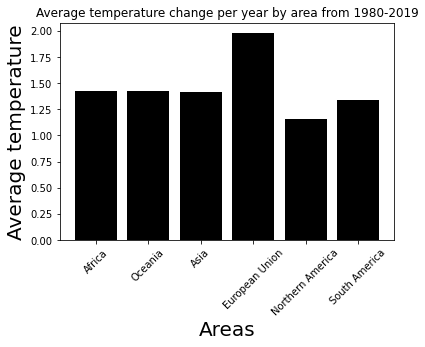

In [26]:
# plot the average temperature change per year by area

#the average number of crimes per year by category

anniunici= data2_focus.Date.unique()
import numpy as np

average=[]

for continent in focus_area:
    temp1=data2_focus[data2_focus['Area']== continent]
    
    for anno in anniunici:
        temp2=temp1[temp1['Date']==anno]
    
    media= temp2["temperature change"].mean()  #mean of the list
    average.append(media)
    temp2=[]
    
    
fig = plt.figure()
plt.bar(focus_area,average, color= 'black')
plt.title("Average temperature change per year by area from 1980-2019")
plt.rc('axes', titlesize=20)
plt.xlabel("Areas", fontsize= 20)
plt.ylabel("Average temperature", fontsize= 20)
plt.xticks(rotation=45)
plt.show()
#fig.savefig("Average temperature change per year by area from 1980-2019.jpg")   
    

## Plot year-by-year average temperature change of each of the focus areas across the years 1980-2019

In [27]:
# bar-charts displaying the year-by-year average temperature change of each of these focus areas across the years 1980-2019
temperature_per_y= data2_focus.groupby(['Area','Date']).mean().reset_index(drop=False)[['Area', 'Date', 'temperature change']].rename(columns={'temperature change': 'Average temperature change'})           
temperature_per_y.head()

,Area,Date,Average temperature change
0,Africa,Y1980,0.357882
1,Africa,Y1981,0.167824
2,Africa,Y1982,0.156235
3,Africa,Y1983,0.430824
4,Africa,Y1984,0.312647


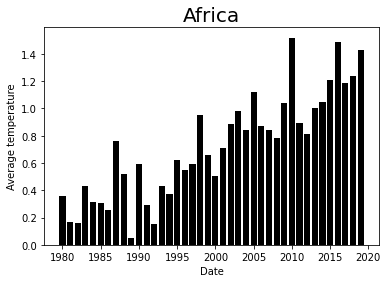

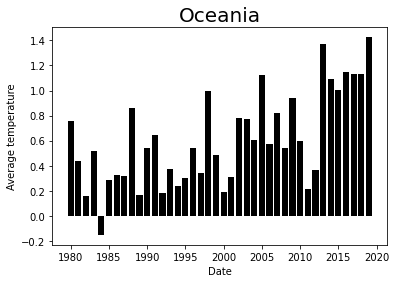

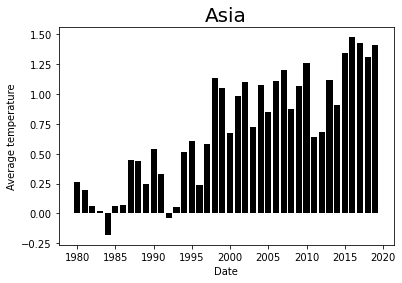

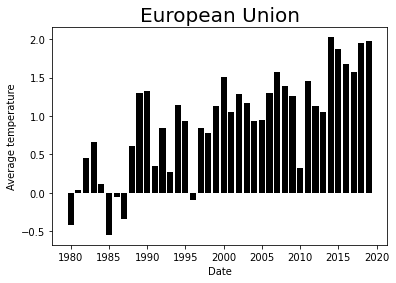

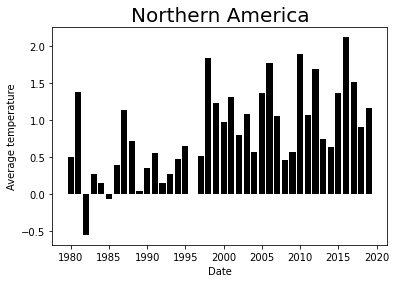

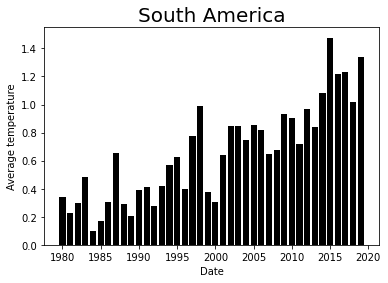

In [28]:
import numpy as np
import matplotlib.pyplot as plt
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])


for continent in focus_area:

    temp1=temperature_per_y[temperature_per_y['Area']== continent]
    #ax.add_subplot()
    #a= temp1['Average temperature change']
    
    
    
    
    
    #a.plot.bar(x='Date', y='Average temperature change', title= continent, xlabel= "Date", ylabel= "Average")
    

    fig = plt.figure()
    plt.bar(range(1980, 2020),temp1["Average temperature change"], color= 'black')
    plt.title(continent)
    #plt.rc('axes', titlesize=20)
    plt.xlabel("Date")
    plt.ylabel("Average temperature")
   
    plt.show()
    #fig.savefig("Average temperature change per year by area from 1980-2019.jpg")  


## Plot of the tempearure anomalies from 1980-2019 

In [29]:
# Data 2 and 5: model that determines the relationship between emissions and global warming
data2= data2[data2.Element== "Temperature change"]
data2= data2.drop("Element", 1)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_32658/3764037084.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data2= data2.drop("Element", 1)


In [30]:
world= data2[data2.Area== "World"]
world= world.drop(["Area Code","Area", "Months Code","Element Code"], 1)
world= world.iloc[:12, :]
world= world.drop(["Months", "Unit"], 1)
#world.head()

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_32658/1203244787.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  world= world.drop(["Area Code","Area", "Months Code","Element Code"], 1)
/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_32658/1203244787.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  world= world.drop(["Months", "Unit"], 1)


In [31]:
world= world.melt(id_vars=[], var_name= "Year", value_name= "Temperature Anomalies")
world= world.groupby("Year").mean()
world.head()

,Temperature Anomalies
Year,
Y1980,0.280083
Y1981,0.479500
Y1982,0.041083
Y1983,0.421000
Y1984,0.050333


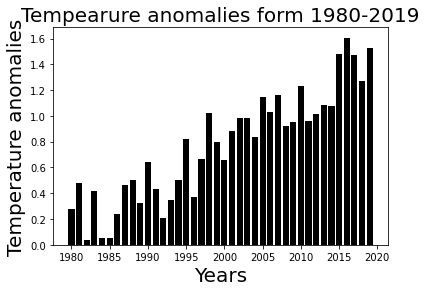

In [32]:
#bar plot with the tempearure anomalies form 1980-2019
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.bar(range(1980, 2020),world["Temperature Anomalies"], color= 'black')
plt.title("Tempearure anomalies form 1980-2019")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 20)
plt.ylabel("Temperature anomalies", fontsize= 20)
plt.show()
#fig.savefig("Tempearure anomalies form 1980-2019.jpg")

## Comment:

From the bar plot above, we can seen that the general trend of the temperature anomalies level has been growing a lot in those 40 years with some alternating higher peaks and some valleys. 
Starting from a level of 0,28 in 1980, it reached a peak in 2016 of around 1,61, which is almost 6 times higher.

Global Warming is the long-term heating of Earth’s climate system and it has been observed since the pre-industrial period (between 1850 and 1900). It is due to human activities, primarily fossil fuel burning, which increases heat-trapping greenhouse gas levels in Earth’s atmosphere.
https://climate.nasa.gov/resources/global-warming-vs-climate-change/

As stated in this Unite Nations' [article](https://www.un.org/en/chronicle/article/health-effects-global-warming-developing-countries-are-most-vulnerable), in the latest 50 years the level of temperatures has increased exponentially and represents a huge warning for the sake of our planet. The World Health Organization (WHO) reports that climate change is responsible for at least 150,000 deaths per year, a number that is expected to double by 2030.
In fact, Global Warming can result in many serious alterations both to the environment and to human health. 
For example it can cause a rise in sea level, leading to the loss of coastal land, a change in precipitation patterns, increased risks of droughts and floods, and threats to biodiversity.
Among the various problems that it can cause to human health we can mention infectious diseases and respiratory diseases such as asthma. 





# Data3

In [33]:
data3

,Energy,mortality
0,Coal,100000
1,Oil,36000
2,Natural gas,4000
3,Hydro,1400
4,Rooftop solar,440
5,Wind,150
6,Nuclear,90


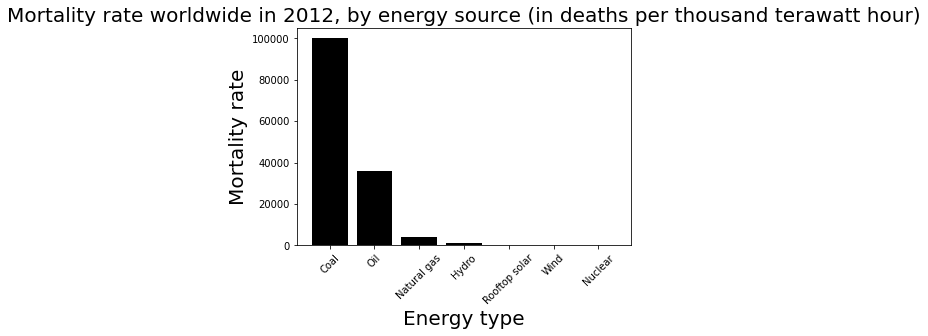

In [34]:
# bar plot of the mortality rate per each type of energy 
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
plt.bar(data3.Energy,data3.mortality, color= 'black')
plt.title("Mortality rate worldwide in 2012, by energy source (in deaths per thousand terawatt hour)")
plt.rc('axes', titlesize=20)
plt.xlabel("Energy type", fontsize= 20)
plt.ylabel("Mortality rate", fontsize= 20)
plt.xticks(rotation=45)
plt.show()
#fig.savefig("mortality rate by energy source.jpg")

### Comment: 

From this bar plot we can see that the mortality rates due to the coal and oil types of energy are the highest, while the nuclear energy has the lowest mortality rate.

On contrary, as we all know, the nuclear energy is often associated with a feeling of fear among people, but is it a well-founded fear? If it is so safe, why are we afraid of it?

Specialists claim that the nuclear accidents at Three Mile Island, Chernobyl and Fukushima frightened people not because of the number of deaths that was low, but because of how governments responded and managed them, always overreacting. In fact, the panicked and frightened management of governments has always conveyed a very negative message to people about nuclear energy. 

As discussed in this [article](https://www.forbes.com/sites/michaelshellenberger/2018/06/11/if-nuclear-power-is-so-safe-why-are-we-so-afraid-of-it/?sh=90774d663859), a first step towards the improvement of this situation could be the change in gpvernments' management of a possible future nuclear accident.

# Data145

In [35]:
data145.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions
0,Africa,1980,49.047,32.009,0.0,0.000,7.903,0.0,11.007,0.034,3569.616,536509759
1,Africa,1981,46.881,33.628,0.0,0.000,7.374,0.0,12.085,0.032,3861.601,549389371
2,Africa,1982,46.099,34.736,0.0,0.000,6.909,0.0,12.223,0.032,4008.212,572603068
3,Africa,1983,46.413,34.407,0.0,0.000,6.063,0.0,13.086,0.031,4000.224,595441085
4,Africa,1984,45.905,35.640,0.0,0.509,5.773,0.0,12.142,0.030,4017.939,650285298


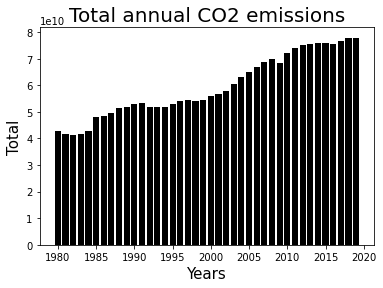

In [36]:
# annual CO2 emissions from 1980-2019

anni_unici= data145.Year.unique()

tot_CO2= np.zeros(len(anni_unici))
i= 0
for anno in anni_unici:
    temp1=data145[data145['Year']== anno]
    tot_CO2[i]= temp1['Annual CO2 emissions'].sum()
    i= i+1

fig = plt.figure()
plt.bar(anni_unici,tot_CO2, color= 'black')
plt.title("Total annual CO2 emissions")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 15)
plt.ylabel("Total", fontsize= 15)
plt.show()
#fig.savefig('Total_annual_CO2_emissions.png')

### Comment: 

In these 40 years, from 1980 to 2019, the total annual CO2 emissions has almost doubled. This reflectes the big changes in the society we are living in. We consume a lot and we have a really big impact on the enviroment. These CO2 levels need to be a huge warning for all of us.

In many coutries, it is common to start taking care of this problem, but unfortunately this is not true in all the world.

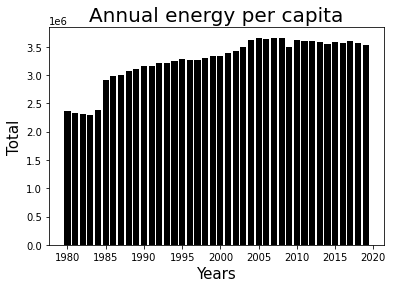

In [37]:
# annual energy per capita 

energy_capita= np.zeros(len(anni_unici))
i= 0
for anno in anni_unici:
    temp1=data145[data145['Year']== anno]
    energy_capita[i]= temp1['Energy per capita (kWh)'].sum()
    i= i+1

fig = plt.figure()
plt.bar(anni_unici,energy_capita, color= 'black')
plt.title("Annual energy per capita")
plt.rc('axes', titlesize=20)
plt.xlabel("Years", fontsize= 15)
plt.ylabel("Total", fontsize= 15)
plt.show()
#fig.savefig('Annual energy per capita.png')

## Comment: 
As can be seen in this bar plot above, the annual energy per capita has increased in the range of years 1980-2005, but it has then slightly decreased or kept on the same level.
This is probably due to the measures that the various countries have decided to adopt to tackle the environmental problem.

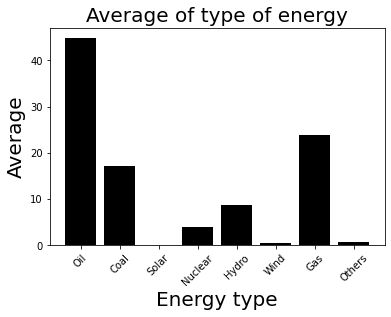

In [38]:
# bar plot with the means of the different types of energy

mean_oil= data145['Oil'].mean()
mean_coal= data145['Coal'].mean()
mean_solar= data145['Solar'].mean()
mean_nuclear= data145['Nuclear'].mean()
mean_hydro= data145['Hydro'].mean()
mean_wind= data145['Wind'].mean()
mean_gas= data145['Gas'].mean()
mean_otherren= data145['Others renewables'].mean()

energy_type= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others']
means=[mean_oil, mean_coal, mean_solar, mean_nuclear, mean_hydro, mean_wind, mean_gas, mean_otherren]

fig = plt.figure()
plt.bar(energy_type,means, color= 'black')
plt.title("Average of type of energy")
plt.rc('axes', titlesize=20)
plt.xlabel("Energy type", fontsize= 20)
plt.ylabel("Average", fontsize= 20)
plt.xticks(rotation=45)
plt.show()
#fig.savefig("average_type_of_energy.jpg")

## Comment: 
As can be seen from the bar plot above, on average the most used types of energy are the Oil one, followed by Gas, Coal and then Hydro. On contrary, on avergae the least used are solar, wind and other types and this can be due to the fact that not all the countries have the right atmospheric climate to use them in an efficient way.
The nuclear is not so used also due to the fear that it creates in many countries.

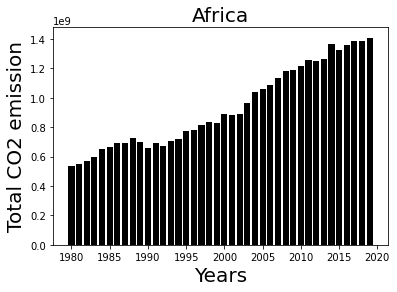

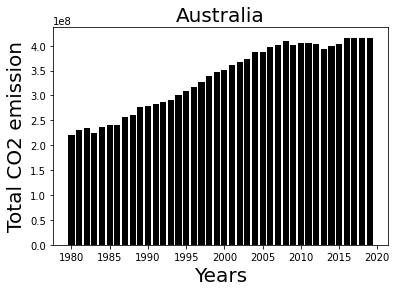

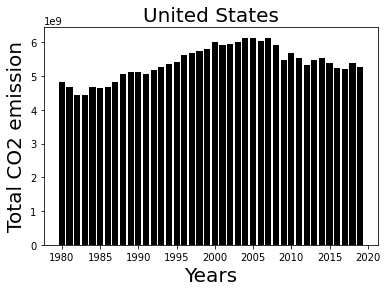

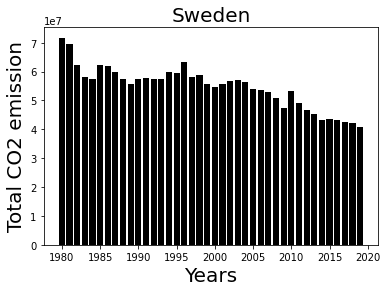

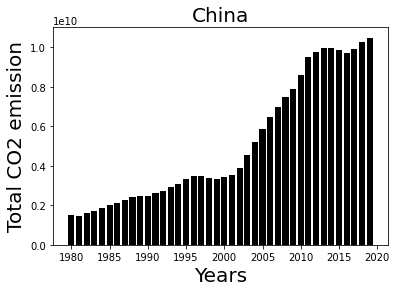

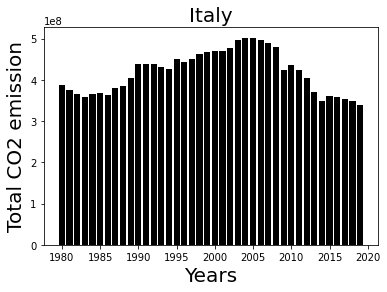

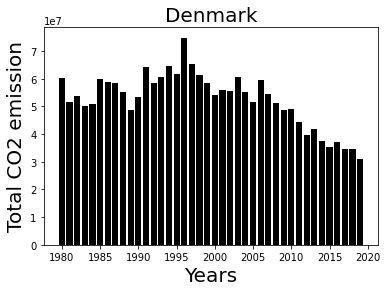

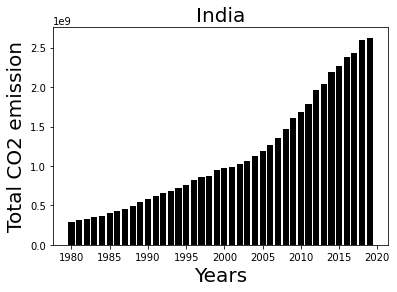

In [39]:
# emissions for each country 
import matplotlib.pyplot as plt
import numpy as np

#country_names= data145.Country.unique()
country_names= ["Africa", "Australia", "United States", "Sweden", "China", "Italy", "Denmark", "India"]
years_list= data145.Year.unique()

for country in country_names:
    temp1=data145[data145['Country']== country]
        
    fig=plt.figure()
    plt.bar(temp1.Year, temp1["Annual CO2 emissions"], color= 'black')
    plt.title(country)
    plt.rc('axes', titlesize=20)
    plt.xlabel("Years", fontsize= 20)
    plt.ylabel("Total CO2 emission", fontsize= 20)


## Comment: 

Bar plot for each focus area of the total CO2 emissions

## Bokeh plot of the different types of energy

In [40]:
from bokeh.plotting import figure,show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, CDSView, GroupFilter
#Converting the DataFrame to Bokeh ColumnDataSource
year_energy= ColumnDataSource(data=df_world)
year_energy

ColumnDataSource(id='1002', ...)

In [41]:
# Creating an empty figure
output_notebook()
p = figure(title= "Types of energy in the world (1980-2019)", width=950, height=600) 
colors = ["#c9d9d3", "#718dbf", "#e84d60", "#b3de69", "#4de8d5", "#4d60e8", "#e8884d", "green"]

energy_type= ['Oil', 'Coal', 'Solar', 'Nuclear', 'Hydro', 'Wind', 'Gas', 'Others']

# Adding bars
bar ={} # to store vbars 
# here we will do a for loop to create a bar for each race
c=0
for indx,i in enumerate(energy_type):
    bar[i] = p.vbar(x= 'Year',  top=i, source= year_energy, legend_label=i, fill_color= colors[c]) 
    c= c+1
    
# Defining the X-Axis Label
p.xaxis.axis_label = "Year"
 
# defining the Y-Axis Label
p.yaxis.axis_label = "Total"    
    
#Make your legend interactive and display the figure
p.legend.click_policy="mute" #assigns the click policy (you can try to use ''hide') 
p.legend.location = "top_right"
p.legend.orientation= 'horizontal'
show(p)

Loading BokehJS ...

ERROR:bokeh.core.validation.check:E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name. This could either be due to a misspelling or typo, or due to an expected column being missing. : key "top" value "Others" [renderer: GlyphRenderer(id='1165', ...)]


## Comment:

Looking at this interactive Bokeh plot, we can see the amount of each energy type in the world from 1980 to 2019.
In particular we can see that the wind energy is not so common, but it has been used from around 2002 on and has an increasing trend, and similarly also teh solar one which has been used since 2012.

The highest one is the Oil energy, whose trend is generally decreasing; followed by the Coal energy, that has an oscillatory trend, with a peak in 2011 and it is currently in the decreasing phase; and followed by the gas energy which has an overall slightly increasing trend over this years period. 

The hydro energy has always mantained the same stable level and finally the nuclear energy is the most interesting one since, as we have already seen, it creates fear in people that prefer to avoid its use. In fact, from this plot we can see how its trend has increased in the period 1980-2000, but then, with the beginnning of the new century, it begun to decrease and then stabilized from 2013 on.

## Plot map of the CO2 emissions in the world in 2019

<AxesSubplot:>

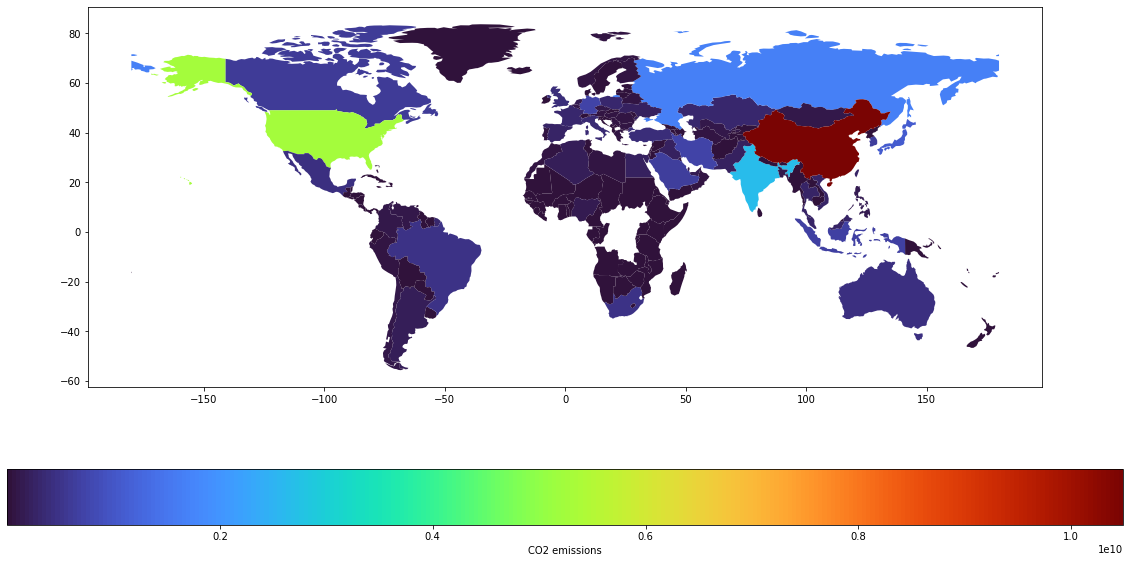

In [43]:
#https://blog.getambee.com/plotting-geographical-data-in-python/ 

# pip install descartes
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import style

#‘naturalearth_lowres’ dataset which contains the shape of all countries in the world
worldmap = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
worldmap["name"].replace({"United States of America": "United States"}, inplace=True)

#We will now merge the data5 filtered for 2019 to the world GeoDataFrame.
data5filtered= data5[data5.Year == 2019]
data5filtered.pop("Year")
data5filtered.columns= ["name", 'CO2 emissions']

#world=world.merge(data5filtered,left_on='name',right_on='name',how='outer')
worldmap=pd.merge(worldmap, data5filtered, on= ["name"])

worldmap.plot(column='CO2 emissions',figsize=(20,10),legend=True, cmap='turbo', legend_kwds={'label': "CO2 emissions",'orientation':"horizontal"},missing_kwds={'color': 'lightgrey'})

## Movie heathmap of the world from 1980- 1995


In [44]:
#creating data14567 for the heatmaps and movies
# merging data145, data6 and data7
data1456 = pd.merge(data145, data6, on=['Country'])
data14567 = pd.merge(data1456, data7, on=['Country'])
data14567.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions,Population,latitude,longitude
0,Algeria,1980,37.382,0.420,0.0,0.0,0.403,0.0,61.795,0.0,9213.403,66416467,43984569,28.033886,1.659626
1,Algeria,1981,33.155,0.243,0.0,0.0,0.473,0.0,66.129,0.0,10851.361,46341982,43984569,28.033886,1.659626
2,Algeria,1982,30.470,3.915,0.0,0.0,0.536,0.0,65.078,0.0,12126.704,39173029,43984569,28.033886,1.659626
3,Algeria,1983,31.334,3.198,0.0,0.0,0.241,0.0,65.227,0.0,12838.885,52503909,43984569,28.033886,1.659626
4,Algeria,1984,36.139,3.693,0.0,0.0,0.483,0.0,59.686,0.0,11951.858,70946530,43984569,28.033886,1.659626


In [174]:
#movie 1980-1995
import folium
from folium import plugins

lat= 20.0000 #Y
lon= 9.0000 #X
m1 = folium.Map([lat, lon], zoom_start=2)#tiles = "Stamen Toner"


# Ensure you're handing it floats
data14567['latitude'] =data14567['latitude'].astype(float)
data14567['longitude'] = data14567['longitude'].astype(float)

#rescaling the Annual CO2 emissions values to plot the rispective intensity
max_emissions= data14567["Annual CO2 emissions"].max()
data14567["Annual CO2 emissions"]= data14567["Annual CO2 emissions"].div(max_emissions).div(0.001).apply(lambda x: np.ceil(x))


In [ ]:
data14567_concat= data14567.iloc[:0]

for i in range (0, len(data14567)):
    reps = int(data14567["Annual CO2 emissions"][i])
    
    data14567_concat = data14567_concat.append([data14567[data14567.index == i]]*reps)

In [ ]:
data14567_concat["latitude"] = data14567_concat["latitude"].apply(lambda x: x+np.random.normal(0,2))
data14567_concat["longitude"] = data14567_concat["longitude"].apply(lambda x: x+np.random.normal(0,2))

In [ ]:
# List comprehension to make out list of lists
data14567_data = [[[row['latitude'],row['longitude']] for index, row in data14567_concat[data14567_concat['Year']==i].iterrows()] for i in range(1980,1995)]

# Plot it on the map
hmm = plugins.HeatMapWithTime(data14567_data,auto_play=True,max_opacity=0.8, gradient={0.1: 'blue', 0.25:'green', 0.5:'yellow', 0.75:'orange',1:'red'}, radius=15)
hmm.add_to(m1)
# Display the map
m1

## Movie with box plot

In [45]:
#https://towardsdatascience.com/an-interactive-co2-emissions-dashboard-with-plotly-and-streamlit-b0bd4ae80cc8
data14567.head()

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions,Population,latitude,longitude
0,Algeria,1980,37.382,0.420,0.0,0.0,0.403,0.0,61.795,0.0,9213.403,66416467,43984569,28.033886,1.659626
1,Algeria,1981,33.155,0.243,0.0,0.0,0.473,0.0,66.129,0.0,10851.361,46341982,43984569,28.033886,1.659626
2,Algeria,1982,30.470,3.915,0.0,0.0,0.536,0.0,65.078,0.0,12126.704,39173029,43984569,28.033886,1.659626
3,Algeria,1983,31.334,3.198,0.0,0.0,0.241,0.0,65.227,0.0,12838.885,52503909,43984569,28.033886,1.659626
4,Algeria,1984,36.139,3.693,0.0,0.0,0.483,0.0,59.686,0.0,11951.858,70946530,43984569,28.033886,1.659626


# 3) Data Analysis

The goal of this analysis is to deep dive into the environmental problems with a different point of view.
We often hear about reducing emissions, but what about proposing a specific ratio of energy type?
The key point will consist of using the first [greenest country](https://sustainabilitymag.com/top10/top-10-greenest-countries-2)'s energy types proportions. In fact, we will apply Sweden energy types proportions to the whole world and see if the levels of CO2 emissions, temperature anomalies and mortality could improve.

The analysis will be divided in three parts:
1) classification of country as green or not depending on the **CO2 emissions.**

2) analysis of the current **CO2 emissions** and the hypothetical ones if the Sweden energy types proportions would be used by all the world

3) analysis of the current **temperature anomalies** and the hypothetical ones if the Sweden energy types proportions would be used by all the world

4) analysis of the current **mortality rate** and the hypothetica one if the Sweden energy types proportions would be used by all the world

## 1)  Classification: green or not green

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [ ]:
data_temp = datanew.copy()
data_temp["Country"] = data_class["Country"]
median = data_temp["Annual CO2 emissions"].median()

#let's create another column that determines if the country is green or not based on the median of emissions.
data_temp["green"] = (data_temp["Annual CO2 emissions"] <= median).apply(lambda x: int(x))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = data_temp.drop(["green", "Country", "Annual CO2 emissions"], 1)
y = data_temp["green"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)

y_hat=rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_hat)



In [ ]:
#let's plot the

import seaborn as sns
fig = sns.heatmap(cm, annot=True, fmt='g', cmap="BuPu")

In [ ]:
#plot the feature importance
importances = rf.feature_importances_
attributeNames = np.asarray(X.columns)
sort = rf.feature_importances_.argsort()
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)[sort]
importances = rf.feature_importances_[sort]
#attributeNames = X_vis3.columns PRIMA DIFFERENZA, ATTENTO
names = attributeNames[sort]


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.barh(names, importances, color="black")
ax.set_title("Feature importances")
ax.set(xlabel="Value of feature", ylabel="Feature Name")
ax.grid()

The model performes very well, it has a 100% accuracy. So based upon the amount of energy produced by category the model can determine with a high degree of accuracy if the country is green or not. <br>
As we can see, the energy types that produce more emissions are the most influential in the model. This is as expected, as the degree of usage of nuclear for example wont influence the amount of emissions, since it has low emissions.

### What if he used as input the percentage of energy? 
We have seen that the amount of green energy types used isn't influential in the model. But how about the percentage of energy type per total energy used?

In [ ]:
data_percentage = data_class.drop(["Country", "Energy per capita (kWh)", "Population","Year"], 1)
X = data_percentage.drop("Annual CO2 emissions",1)
y = data_temp["green"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)

y_hat=rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_hat)

In [ ]:
importances = rf.feature_importances_
attributeNames = np.asarray(X.columns)
sort = rf.feature_importances_.argsort()
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)[sort]
importances = rf.feature_importances_[sort][0:]
#attributeNames = X_vis3.columns PRIMA DIFFERENZA, ATTENTO
names = attributeNames[sort][0:]


import matplotlib.pyplot as plt

fig, ax = plt.subplots(1)
ax.barh(names[:-2], importances[:-2], color="black")
ax.set_title("Feature importances")
ax.set(xlabel="Value of feature", ylabel="Feature Name")
ax.grid()

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='g', cmap="BuPu")

This model is even more performative, and we have a total change in feature importance: we can see that nuclear and oil are the most influential. So probably a low usage of oil, and high of nuclear is conducive towards low emissions.

## 2) Current CO2 emissions and Hypothetical ones

In [269]:
X = datanew.drop("Annual CO2 emissions",1)
y = datanew["Annual CO2 emissions"]

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_26345/3997414703.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = datanew.drop("Annual CO2 emissions",1)


In [270]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [271]:
xg_reg = xgb.XGBRegressor()

In [272]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [273]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
norm_rmse = rmse/(max(y)-min(y))
print("Normalized RMSE: %f" % (norm_rmse))

Normalized RMSE: 0.187712


In [274]:
# Assuming the same proportions of Sweden
datanew= data145[data145.Year == 2019]
datanew1= pd.merge(datanew, data6, on=['Country'])

In [275]:
sweden = datanew1[datanew1.Country == "Sweden"]
sweden

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions,Population
64,Sweden,2019,25.648,3.779,0.233,26.651,26.135,7.907,1.685,5.218,62046.398,40936867,10110233


In [276]:
# applying these proportions to the World 
datanew= data145[data145.Year == 2019]
world2 = datanew[datanew.Country == "World"]#
world2["Population"] = datanew1.Population.sum()#

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_26345/2145205358.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world2["Population"] = datanew1.Population.sum()#


In [277]:
world2["Tot energy consumption teraWh"] = world2["Population"]*world2["Energy per capita (kWh)"]/1000000000

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_26345/681799353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world2["Tot energy consumption teraWh"] = world2["Population"]*world2["Energy per capita (kWh)"]/1000000000


In [278]:
world_energy = world2.copy()

In [279]:
world2["Tot energy consumption teraWh"].to_numpy()*sweden["Oil"].to_numpy()/100

array([33680.55263742])

In [280]:
sweden["Oil"].to_numpy()

array([25.648])

In [281]:
world2["Oil"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Oil"].to_numpy()/100
world2["Coal"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Coal"].to_numpy()/100
world2["Solar"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Solar"].to_numpy()/100
world2["Nuclear"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Nuclear"].to_numpy()/100
world2["Hydro"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Hydro"].to_numpy()/100
world2["Wind"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Wind"].to_numpy()/100
world2["Gas"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Gas"].to_numpy()/100
world2["Others renewables"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Others renewables"].to_numpy()/100

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_26345/4131403660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world2["Oil"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Oil"].to_numpy()/100
/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_26345/4131403660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world2["Coal"] = world2["Tot energy consumption teraWh"].to_numpy()*sweden["Coal"].to_numpy()/100
/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_263

In [282]:
world2
world_energy_sweden = world2.copy()

Let's predict the emissions of the world based on the model:

In [283]:
X = world2.drop(["Country", "Energy per capita (kWh)","Annual CO2 emissions","Population", "Tot energy consumption teraWh","Year"], 1)
old_world_emissions = world2["Annual CO2 emissions"]
X

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_26345/1162963484.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = world2.drop(["Country", "Energy per capita (kWh)","Annual CO2 emissions","Population", "Tot energy consumption teraWh","Year"], 1)


,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
3199,33680.552637,4962.523722,305.971957,34997.676557,34320.073424,10383.348788,2212.715658,6852.196026


In [284]:
new_emissions = xg_reg.predict(X)

In [ ]:
xg_reg.get_booster().get_score()

In [285]:
float(new_emissions)

2625969408.0

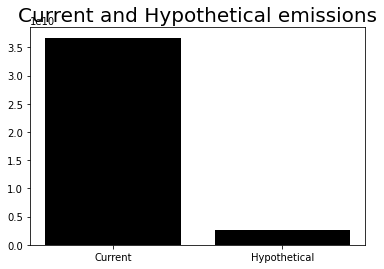

In [319]:
# bar plot of the Current and hypothetical emissions
fig = plt.figure()
plt.bar(["Current", "Hypothetical"],[float(old_world_emissions), float(new_emissions)], color= 'black')
plt.title("Current and Hypothetical emissions")
plt.rc('axes', titlesize=20)
#plt.xlabel("Energy type", fontsize= 20)
#plt.ylabel("Average", fontsize= 20)
plt.show()
#fig.savefig("Current and hypothetical emissions.jpg")

By this [article](https://earth.stanford.edu/news/roadmap-reducing-greenhouse-gas-emissions-50-percent-2030#gs.z0dz1y) we would almost reach the target we aim reaching in 2050. We would successfully stop global warming. 

---
## 3) Create a model that has in input the emissions and in output the temperature anomalies

In [298]:
world.head()

,Temperature Anomalies
Year,
Y1980,0.280083
Y1981,0.479500
Y1982,0.041083
Y1983,0.421000
Y1984,0.050333


In [288]:
world_emissions = data5[data5.Country == "World"]
world_emissions.head()

,Country,Year,Annual CO2 emissions
23648,World,1980,19492613515
23649,World,1981,19026910179
23650,World,1982,18875760275
23651,World,1983,18998031557
23652,World,1984,19656716874


In [289]:
X = world_emissions["Annual CO2 emissions"].to_numpy().reshape(-1,1)
y = world.to_numpy().reshape(-1,1)

In [292]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [293]:
xg_reg = xgb.XGBRegressor()

In [294]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [295]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
norm_rmse = rmse/(max(y)-min(y))
print("Normalized RMSE: %f" % (norm_rmse))

Normalized RMSE: 0.211029


In [296]:
# Let's see the level of anomaly with the emissions associated with sweden's proportions
new_anomaly = xg_reg.predict(new_emissions)
old_anomaly = y[-1]

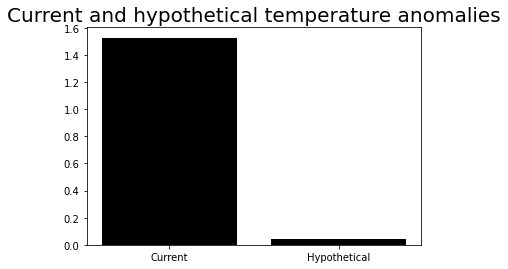

In [320]:
# bar plot of the Current and hypothetical temperature anomalies
fig = plt.figure()
plt.bar(["Current", "Hypothetical"],[float(old_anomaly), float(new_anomaly)], color= 'black')
plt.title("Current and hypothetical temperature anomalies")
plt.rc('axes', titlesize=20)
#plt.xlabel("Energy type", fontsize= 20)
#plt.ylabel("Average", fontsize= 20)
plt.show()
#fig.savefig("Current and hypothetical temperature anomalies.jpg")

---
## 4) Let's confront the current mortality rate, with the sweden-proportion mortality 

In [299]:
data3

,Energy,mortality
0,Coal,100000
1,Oil,36000
2,Natural gas,4000
3,Hydro,1400
4,Rooftop solar,440
5,Wind,150
6,Nuclear,90


In [300]:
world_energy

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions,Population,Tot energy consumption teraWh
3199,World,2019,33.059,27.035,1.105,4.269,6.446,2.183,24.226,0.995,20941.391,36702502903,6270759983,131318.436671


In [301]:
world_energy_sweden

,Country,Year,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables,Energy per capita (kWh),Annual CO2 emissions,Population,Tot energy consumption teraWh
3199,World,2019,33680.552637,4962.523722,305.971957,34997.676557,34320.073424,10383.348788,2212.715658,6852.196026,20941.391,36702502903,6270759983,131318.436671


In [302]:
world_energy["Oil"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Oil"].to_numpy()/100
world_energy["Coal"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Coal"].to_numpy()/100
world_energy["Solar"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Solar"].to_numpy()/100
world_energy["Nuclear"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Nuclear"].to_numpy()/100
world_energy["Hydro"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Hydro"].to_numpy()/100
world_energy["Wind"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Wind"].to_numpy()/100
world_energy["Gas"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Gas"].to_numpy()/100
world_energy["Others renewables"] = world_energy["Tot energy consumption teraWh"].to_numpy()*world_energy["Others renewables"].to_numpy()/100

In [303]:
world_energy = world_energy.drop(["Country", "Year", "Energy per capita (kWh)", "Annual CO2 emissions", "Population", "Tot energy consumption teraWh"], 1)
world_energy_sweden = world_energy_sweden.drop(["Country", "Year", "Energy per capita (kWh)", "Annual CO2 emissions", "Population", "Tot energy consumption teraWh"], 1)

/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_26345/1624011359.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  world_energy = world_energy.drop(["Country", "Year", "Energy per capita (kWh)", "Annual CO2 emissions", "Population", "Tot energy consumption teraWh"], 1)
/var/folders/vt/s658dnz54fbf1fgjx18nklh00000gn/T/ipykernel_26345/1624011359.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  world_energy_sweden = world_energy_sweden.drop(["Country", "Year", "Energy per capita (kWh)", "Annual CO2 emissions", "Population", "Tot energy consumption teraWh"], 1)


In [304]:
world_energy = world_energy / 1000
world_energy_sweden = world_energy_sweden/1000
world_energy_sweden 

,Oil,Coal,Solar,Nuclear,Hydro,Wind,Gas,Others renewables
3199,33.680553,4.962524,0.305972,34.997677,34.320073,10.383349,2.212716,6.852196


In [305]:
mortality_sweden = pd.DataFrame(columns = ["Oil", "Coal", "Gas", "Hydro", "Solar", "Wind", "Nuclear"])

In [306]:
mortality_sweden["Oil"] = world_energy_sweden["Oil"].to_numpy()*data3["mortality"][data3.Energy == "Oil"].to_numpy()
mortality_sweden["Coal"] = world_energy_sweden["Coal"].to_numpy()*data3["mortality"][data3.Energy == "Coal"].to_numpy()
mortality_sweden["Gas"] = world_energy_sweden["Gas"].to_numpy()*data3["mortality"][data3.Energy == "Natural gas"].to_numpy()
mortality_sweden["Hydro"] = world_energy_sweden["Hydro"].to_numpy()*data3["mortality"][data3.Energy == "Hydro"].to_numpy()
mortality_sweden["Solar"] = world_energy_sweden["Solar"].to_numpy()*data3["mortality"][data3.Energy == "Rooftop solar"].to_numpy()
mortality_sweden["Wind"] = world_energy_sweden["Wind"].to_numpy()*data3["mortality"][data3.Energy == "Wind"].to_numpy()
mortality_sweden["Nuclear"] = world_energy_sweden["Nuclear"].to_numpy()*data3["mortality"][data3.Energy == "Nuclear"].to_numpy()

In [307]:
mortality_sweden

,Oil,Coal,Gas,Hydro,Solar,Wind,Nuclear
0,1.212500e+06,496252.37218,8850.862632,48048.102794,134.627661,1557.502318,3149.79089


In [308]:
mortality_world = pd.DataFrame(columns = ["Oil", "Coal", "Gas", "Hydro", "Solar", "Wind", "Nuclear"])

In [309]:
mortality_world["Oil"] = world_energy["Oil"].to_numpy()*data3["mortality"][data3.Energy == "Oil"].to_numpy()
mortality_world["Coal"] = world_energy["Coal"].to_numpy()*data3["mortality"][data3.Energy == "Coal"].to_numpy()
mortality_world["Gas"] = world_energy["Gas"].to_numpy()*data3["mortality"][data3.Energy == "Natural gas"].to_numpy()
mortality_world["Hydro"] = world_energy["Hydro"].to_numpy()*data3["mortality"][data3.Energy == "Hydro"].to_numpy()
mortality_world["Solar"] = world_energy["Solar"].to_numpy()*data3["mortality"][data3.Energy == "Rooftop solar"].to_numpy()
mortality_world["Wind"] = world_energy["Wind"].to_numpy()*data3["mortality"][data3.Energy == "Wind"].to_numpy()
mortality_world["Nuclear"] = world_energy["Nuclear"].to_numpy()*data3["mortality"][data3.Energy == "Nuclear"].to_numpy()

In [310]:
mortality_world

,Oil,Coal,Gas,Hydro,Solar,Wind,Nuclear
0,1.562852e+06,3.550194e+06,127252.817872,11850.700999,638.470239,430.002221,504.538566


In [311]:
mortality_world_total = mortality_world.sum(axis=1).to_numpy()
mortality_sweden_total = mortality_sweden.sum(axis=1).to_numpy()

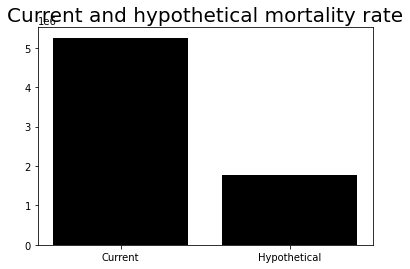

In [321]:
# bar plot of the Current and hypothetical mortality rate
fig = plt.figure()
plt.bar(["Current", "Hypothetical"],[float(mortality_world_total), float(mortality_sweden_total)], color= 'black')
plt.title("Current and hypothetical mortality rate")
plt.rc('axes', titlesize=20)
#plt.xlabel("Energy type", fontsize= 20)
#plt.ylabel("Average", fontsize= 20)
plt.show()
#fig.savefig("Current and hypothetical mortality rate.jpg")

# 4) Genre

> * Which genre of data story did you use?

The genre we chose is the slideshow genre, combined with the magazine one in order to have a nice balance between visualizations and text for explainations. Our aim is to communicate a simple, direct and impactful message so that people can see the optimal results we would have if the whole world used the proportions of different types of energy like Sweden does.

http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf

> * Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?




> * Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

# 5) Visualizations

> * Explain the visualizations you've chosen.
> * Why are they right for the story you want to tell?

# 6) Discussion
Think critically about your creation
> * What went well?
> * What is still missing? What could be improved? Why?

# References 

# Contributions